In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pd.read_csv('data.csv')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


<AxesSubplot:>

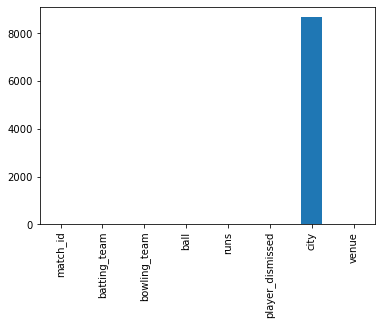

In [6]:
df.isnull().sum().plot.bar()

In [6]:
# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

In [8]:
len(df['city'].unique())

96

In [9]:
len(df['venue'].unique())

140

<AxesSubplot:>

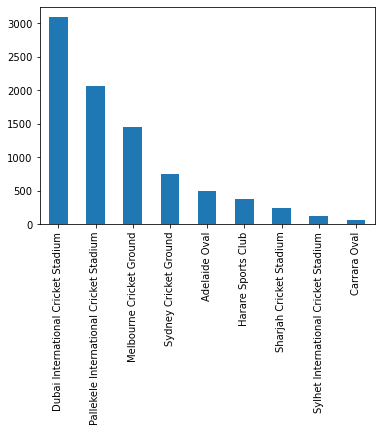

In [7]:
df[df['city'].isnull()]['venue'].value_counts().plot.bar()

In [8]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [9]:
cities

array(['Melbourne', 'Melbourne', 'Melbourne', ..., 'Colombo', 'Colombo',
       'Colombo'], dtype=object)

In [10]:
df['city'] = cities

In [11]:
len(df['city'].unique())

97

In [12]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [13]:
df.drop(columns=['venue'],inplace=True)

In [14]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo


<AxesSubplot:>

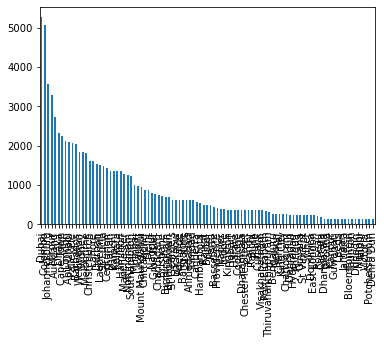

In [18]:
df['city'].value_counts().plot.bar()

In [19]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [20]:
df = df[df['city'].isin(eligible_cities)]

In [21]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo


In [22]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

/tmp/ipykernel_31601/1598928411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [23]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo,125
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo,125
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [24]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

/tmp/ipykernel_31601/2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
/tmp/ipykernel_31601/2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [25]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

/tmp/ipykernel_31601/562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [26]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

/tmp/ipykernel_31601/2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
/tmp/ipykernel_31601/2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
84414,1607,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
84415,1607,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
84416,1607,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [27]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

/tmp/ipykernel_31601/540685528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
/tmp/ipykernel_31601/540685528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
/tmp/ipykernel_31601/540685528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [28]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
84414,1607,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
84415,1607,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
84416,1607,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [29]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84413,1607,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
84414,1607,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
84415,1607,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
84416,1607,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [30]:
df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left']]

,batting_team,bowling_team,city,current_score,balls_left,wickets_left
0,Australia,Sri Lanka,Melbourne,0,119,10
1,Australia,Sri Lanka,Melbourne,0,118,10
2,Australia,Sri Lanka,Melbourne,1,117,10
3,Australia,Sri Lanka,Melbourne,3,116,10
4,Australia,Sri Lanka,Melbourne,3,115,10
...,...,...,...,...,...,...
84413,Sri Lanka,Australia,Colombo,125,3,2
84414,Sri Lanka,Australia,Colombo,125,2,2
84415,Sri Lanka,Australia,Colombo,125,1,1
84416,Sri Lanka,Australia,Colombo,127,0,1


In [31]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [32]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','runs_x']]

In [33]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,runs_x
0,Australia,Sri Lanka,Melbourne,0,119,10,168
1,Australia,Sri Lanka,Melbourne,0,118,10,168
2,Australia,Sri Lanka,Melbourne,1,117,10,168
3,Australia,Sri Lanka,Melbourne,3,116,10,168
4,Australia,Sri Lanka,Melbourne,3,115,10,168
...,...,...,...,...,...,...,...
69991,Sri Lanka,Australia,Colombo,125,3,2,128
69992,Sri Lanka,Australia,Colombo,125,2,2,128
69993,Sri Lanka,Australia,Colombo,125,1,1,128
69994,Sri Lanka,Australia,Colombo,127,0,1,128


In [34]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
runs_x           0
dtype: int64

In [35]:
final_df = final_df.sample(final_df.shape[0])

In [36]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,runs_x
40893,India,New Zealand,Christchurch,109,34,3,162
42203,Afghanistan,India,St Lucia,34,73,7,115
24225,Sri Lanka,South Africa,Sharjah,70,56,7,142
63509,Pakistan,Sri Lanka,Colombo,79,53,8,175
40442,India,New Zealand,Wellington,9,111,10,149
...,...,...,...,...,...,...,...
34266,New Zealand,Sri Lanka,Johannesburg,40,82,8,164
62181,New Zealand,Pakistan,Dubai,112,24,6,144
43106,South Africa,New Zealand,Barbados,101,35,7,170
36214,India,Pakistan,Johannesburg,152,3,5,157


In [37]:
pickle.dump(final_df,open('dataset_level3.pkl','wb'))

In [38]:
final_df = pickle.load(open('dataset_level3.pkl','rb'))

In [39]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left
27977,West Indies,Pakistan,Karachi,176,20,8
26059,India,England,Birmingham,91,47,5
26791,Bangladesh,Pakistan,Dhaka,41,68,8
42775,Australia,Bangladesh,Barbados,3,112,10
54764,Australia,Pakistan,Dubai,12,105,10
...,...,...,...,...,...,...
28948,India,West Indies,Lauderhill,127,39,7
39676,England,India,London,122,17,7
18947,England,West Indies,Bridgetown,8,109,10
3170,West Indies,Pakistan,Trinidad,55,61,8


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [42]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [46]:
########## MODEL - 1 (XGBRegressor) #####################

In [43]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=400,learning_rate=0.2,max_depth=12,random_state=1))
])

In [44]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9561154882776605
3.040263165814536


In [45]:
print(list(y_pred))

[132.0529, 92.43988, 166.0961, 145.66225, 150.90765, 132.83484, 138.94514, 175.59666, 101.9636, 165.23183, 152.08762, 131.43765, 139.69403, 101.774765, 141.4263, 162.04385, 142.92899, 181.10396, 188.90402, 157.2414, 208.75266, 128.0665, 222.2217, 95.67745, 178.74461, 210.20168, 202.07115, 134.09052, 127.67045, 168.14357, 183.39641, 138.3948, 123.761154, 117.581726, 207.74844, 49.267063, 158.58421, 118.94841, 125.983055, 166.27484, 140.25186, 156.74545, 129.78181, 161.39493, 213.6724, 199.52698, 73.75189, 181.43527, 229.32642, 190.92595, 140.83034, 161.9922, 197.5587, 172.33995, 192.21964, 137.87976, 153.87111, 144.39087, 168.2242, 134.06773, 154.91223, 143.50107, 158.09248, 220.20496, 153.8497, 174.19548, 182.94336, 148.56415, 151.53616, 128.89871, 192.20401, 161.62848, 217.56859, 207.40085, 116.92673, 153.37753, 199.81802, 222.08376, 167.71017, 105.14705, 167.29468, 200.34981, 169.31856, 98.58887, 139.03362, 144.61324, 168.15028, 125.596596, 211.38138, 194.10178, 166.17455, 173.3909, 

In [46]:
pickle.dump(pipe,open('XGBREGRESSOR_1st_inning_score_prediction.pkl','wb'))

In [47]:
print(list(y_test))

[160, 151, 144, 172, 192, 132, 179, 167, 172, 128, 129, 191, 139, 160, 214, 175, 143, 155, 103, 188, 224, 170, 163, 89, 145, 141, 170, 194, 123, 145, 89, 168, 208, 125, 162, 108, 150, 179, 151, 171, 129, 148, 173, 128, 126, 185, 162, 166, 203, 153, 149, 181, 174, 137, 129, 164, 180, 159, 176, 135, 168, 184, 171, 127, 183, 147, 135, 157, 145, 150, 167, 208, 168, 199, 157, 139, 153, 155, 160, 193, 145, 182, 201, 164, 146, 204, 127, 180, 123, 162, 163, 231, 135, 184, 187, 196, 148, 132, 183, 177, 136, 152, 118, 162, 138, 169, 214, 138, 127, 143, 147, 133, 148, 135, 171, 125, 170, 141, 124, 169, 145, 180, 201, 167, 182, 214, 204, 158, 177, 124, 132, 148, 199, 232, 108, 182, 147, 177, 171, 195, 103, 144, 243, 176, 180, 166, 172, 172, 158, 184, 160, 179, 166, 218, 170, 137, 176, 139, 169, 147, 185, 196, 191, 135, 171, 193, 150, 164, 153, 184, 192, 124, 192, 185, 118, 115, 202, 155, 160, 73, 263, 128, 135, 221, 177, 155, 132, 159, 179, 203, 130, 139, 163, 158, 147, 96, 147, 129, 153, 150, 160

In [47]:
########## MODEL - 2 (RandomForestRegressor) #####################

In [48]:
pipe1 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',RandomForestRegressor(n_estimators = 50, random_state = 0))
])
pipe1.fit(X_train,y_train)
y_pred = pipe1.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.9450941740653118
4.118707695578231


In [49]:
print(list(y_pred))

[162.34, 155.42, 144.48, 158.06, 193.32, 136.64, 166.12, 162.94, 171.06, 130.24, 128.58, 189.16, 136.58, 160.98, 214.14, 174.42, 143.46, 162.08, 107.06, 189.16, 223.16, 170.72, 163.02, 90.3, 148.28, 141.86, 165.68, 190.2, 123.04, 151.42, 90.16, 168.16, 202.32, 125.0, 164.31047619047618, 117.56, 152.24, 176.38, 150.84, 171.6, 124.21333333333332, 150.68, 173.02, 151.62, 130.84, 184.98, 170.28, 166.0, 201.44, 151.04, 150.06, 181.82, 161.7, 137.0, 129.0, 164.34, 173.0, 160.96, 176.68, 146.76, 170.78, 181.86, 171.0, 127.4, 182.02, 142.98, 137.8, 157.0, 160.08, 153.24, 166.98, 214.28, 178.64, 198.18, 157.14, 140.72, 154.4, 154.86, 160.84, 181.6, 146.42, 182.0, 201.0, 161.0, 135.65, 204.42, 118.86, 178.0, 127.06, 162.06, 163.5, 230.48, 140.5, 181.56, 190.84, 191.54, 148.16, 132.0, 180.36, 176.14, 136.56, 157.42, 115.88, 166.16, 140.7, 177.18, 204.2, 124.44, 126.94, 141.54, 154.38333333333333, 134.34, 148.34, 136.56, 172.44, 125.0, 166.46, 142.54, 130.5, 167.86, 146.38, 181.52, 195.8, 165.2, 1

In [50]:
print(list(y_test))

[160, 151, 144, 172, 192, 132, 179, 167, 172, 128, 129, 191, 139, 160, 214, 175, 143, 155, 103, 188, 224, 170, 163, 89, 145, 141, 170, 194, 123, 145, 89, 168, 208, 125, 162, 108, 150, 179, 151, 171, 129, 148, 173, 128, 126, 185, 162, 166, 203, 153, 149, 181, 174, 137, 129, 164, 180, 159, 176, 135, 168, 184, 171, 127, 183, 147, 135, 157, 145, 150, 167, 208, 168, 199, 157, 139, 153, 155, 160, 193, 145, 182, 201, 164, 146, 204, 127, 180, 123, 162, 163, 231, 135, 184, 187, 196, 148, 132, 183, 177, 136, 152, 118, 162, 138, 169, 214, 138, 127, 143, 147, 133, 148, 135, 171, 125, 170, 141, 124, 169, 145, 180, 201, 167, 182, 214, 204, 158, 177, 124, 132, 148, 199, 232, 108, 182, 147, 177, 171, 195, 103, 144, 243, 176, 180, 166, 172, 172, 158, 184, 160, 179, 166, 218, 170, 137, 176, 139, 169, 147, 185, 196, 191, 135, 171, 193, 150, 164, 153, 184, 192, 124, 192, 185, 118, 115, 202, 155, 160, 73, 263, 128, 135, 221, 177, 155, 132, 159, 179, 203, 130, 139, 163, 158, 147, 96, 147, 129, 153, 150, 160

In [51]:
pickle.dump(pipe1,open('Random_forest_regressor_1st_inning_score_prediction1.pkl','wb'))

In [52]:
from sklearn.tree import DecisionTreeRegressor
pipe2 = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',DecisionTreeRegressor(random_state = 0))
])
pipe2.fit(X_train,y_train)
y_pred = pipe2.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8954610196744248
3.1965833333333338


In [54]:
pickle.dump(pipe2,open('DecisionTreeRegressor_regressor_1st_inning_score_prediction1.pkl','wb'))

In [55]:
print(list(y_pred))

[167.0, 153.0, 144.0, 172.0, 192.0, 132.0, 141.0, 167.0, 172.0, 128.0, 129.0, 188.0, 131.0, 160.0, 214.0, 175.0, 143.0, 155.0, 103.0, 188.0, 224.0, 170.0, 163.0, 89.0, 145.0, 141.0, 169.0, 194.0, 123.0, 145.0, 89.0, 168.0, 208.0, 125.0, 162.0, 108.0, 150.0, 172.0, 151.0, 175.0, 124.0, 148.0, 173.0, 208.0, 126.0, 185.0, 162.0, 166.0, 203.0, 153.0, 149.0, 181.0, 174.0, 137.0, 129.0, 164.0, 180.0, 159.0, 176.0, 155.0, 168.0, 184.0, 171.0, 127.0, 183.0, 147.0, 144.0, 157.0, 169.0, 150.0, 167.0, 208.0, 168.0, 199.0, 157.0, 139.0, 157.0, 155.0, 160.0, 134.0, 145.0, 182.0, 201.0, 164.0, 146.0, 204.0, 127.0, 180.0, 123.0, 162.0, 163.0, 231.0, 135.0, 184.0, 187.0, 196.0, 148.0, 132.0, 183.0, 177.0, 136.0, 152.0, 118.0, 209.0, 141.0, 118.0, 214.0, 138.0, 127.0, 143.0, 150.0, 133.0, 148.0, 135.0, 171.0, 125.0, 170.0, 141.0, 124.0, 169.0, 145.0, 180.0, 201.0, 167.0, 182.0, 214.0, 204.0, 173.0, 177.0, 124.0, 132.0, 148.0, 199.0, 232.0, 108.0, 182.0, 147.0, 177.0, 171.0, 195.0, 103.0, 179.0, 243.0, 

In [56]:
print(list(y_test))

[160, 151, 144, 172, 192, 132, 179, 167, 172, 128, 129, 191, 139, 160, 214, 175, 143, 155, 103, 188, 224, 170, 163, 89, 145, 141, 170, 194, 123, 145, 89, 168, 208, 125, 162, 108, 150, 179, 151, 171, 129, 148, 173, 128, 126, 185, 162, 166, 203, 153, 149, 181, 174, 137, 129, 164, 180, 159, 176, 135, 168, 184, 171, 127, 183, 147, 135, 157, 145, 150, 167, 208, 168, 199, 157, 139, 153, 155, 160, 193, 145, 182, 201, 164, 146, 204, 127, 180, 123, 162, 163, 231, 135, 184, 187, 196, 148, 132, 183, 177, 136, 152, 118, 162, 138, 169, 214, 138, 127, 143, 147, 133, 148, 135, 171, 125, 170, 141, 124, 169, 145, 180, 201, 167, 182, 214, 204, 158, 177, 124, 132, 148, 199, 232, 108, 182, 147, 177, 171, 195, 103, 144, 243, 176, 180, 166, 172, 172, 158, 184, 160, 179, 166, 218, 170, 137, 176, 139, 169, 147, 185, 196, 191, 135, 171, 193, 150, 164, 153, 184, 192, 124, 192, 185, 118, 115, 202, 155, 160, 73, 263, 128, 135, 221, 177, 155, 132, 159, 179, 203, 130, 139, 163, 158, 147, 96, 147, 129, 153, 150, 160

In [57]:
final_df['batting_team'].unique()

array(['New Zealand', 'England', 'Australia', 'South Africa',
       'West Indies', 'Sri Lanka', 'India', 'Pakistan', 'Afghanistan',
       'Bangladesh'], dtype=object)

In [58]:
final_df['city'].unique()

array(['Chandigarh', 'Bridgetown', 'Cape Town', 'Pallekele', 'Sydney',
       'Dhaka', 'Centurion', 'London', 'Johannesburg', 'Durban',
       'Auckland', 'Dubai', 'Chittagong', 'Christchurch', 'Mirpur',
       'Wellington', 'Barbados', 'Abu Dhabi', 'Nagpur', 'Lauderhill',
       'Karachi', 'Bangalore', 'Birmingham', 'Lahore', 'St Lucia',
       'Southampton', 'Trinidad', 'Colombo', 'Mumbai', 'Sharjah',
       'Adelaide', 'Cardiff', 'Kolkata', "St George's", 'Brisbane',
       'Nottingham', 'Delhi', 'Melbourne', 'Manchester', 'Hamilton',
       'St Kitts', 'Mount Maunganui', 'Lucknow', 'Gros Islet',
       'Ahmedabad'], dtype=object)

In [62]:
input_df = pd.DataFrame(
     {'batting_team': ['New Zealand'], 'bowling_team': ['New Zealand'],'city':'Abu Dhabi', 'current_score': 100,'balls_left': 100, 'wickets_left': 2})
result = pipe2.predict(input_df)
print(result)

[99.]
